In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

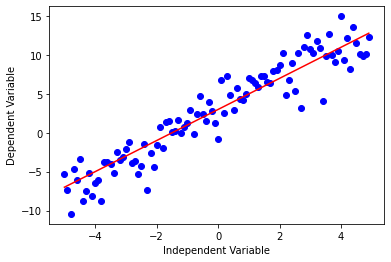

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

# Ingat persamaan Y = (a)X + (b)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

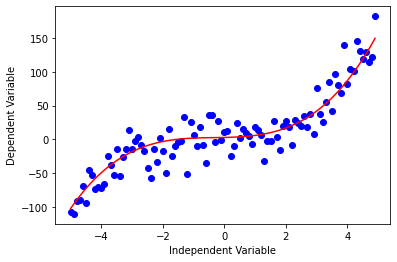

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

# Ingat untuk Regresi Linear Y=(a)X+(b), namun untuk persamaan non Linear berbeda!
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Pada hasil gambar di atas dapat dilihat fungsi  $x^3$ dan $x^2$  adalah independent variables. Inilah fungsi non-linear.

### Contoh fungsi Quadratic
Persamaannya: Y = $X^2$

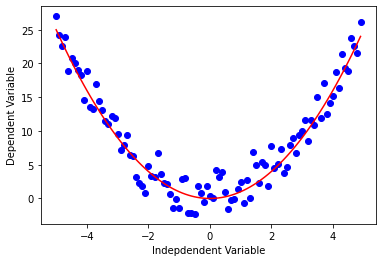

In [6]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Contoh fungsi Exponential
Fungsinya: Y = a+$bc^x$  dimana b ≠0, c > 0 , c ≠1, dan x adalah bilangan real. Basis, c, adalah nilai konstanta dan eksponensial, x, adalah sebuah variabel.

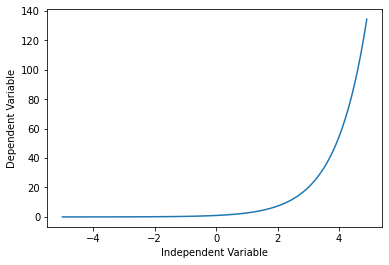

In [8]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Contoh fungsi Logarithmic
Persamaannya: y= log(x)

C:\Users\ribka\AppData\Local\Temp\ipykernel_4464\945852816.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


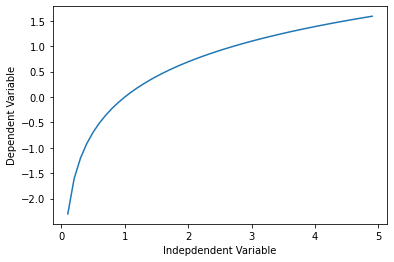

In [9]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic
Persamaannya: 
Y = a + b/1+$c^X-D$

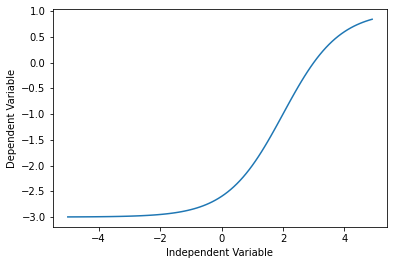

In [10]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Contoh Regresi Non-Linear

In [11]:
import numpy as np
import pandas as pd


# ubah ke data-frame   
df = pd.read_csv("china_gdp.csv")
df.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


## Plotting Dataset

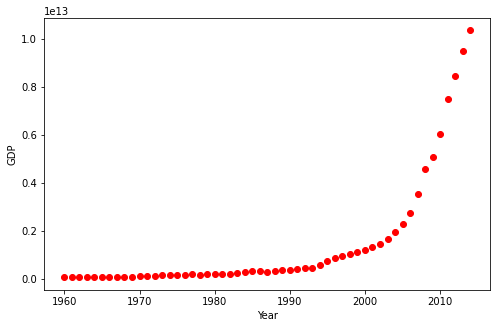

In [12]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Terlihat Pertumbuhannya sangat lambat,lalu mulai 2005 bertumbuh sangat signifikan, dan kemudian naik drastis di tahun 2010.

#### Pilih model
Dari grafik awal dapat kita lihat bahwa fungsi logistik cocok untuk kasus ini.

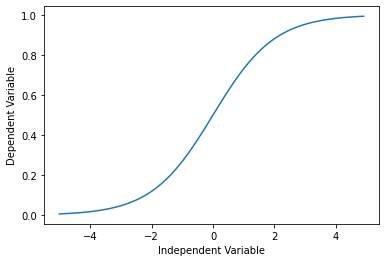

In [13]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

#### Membangun Model
buat model regresi untuk kasus tersebut

In [14]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Coba dengan contoh fungsi sigmoid terhadap data


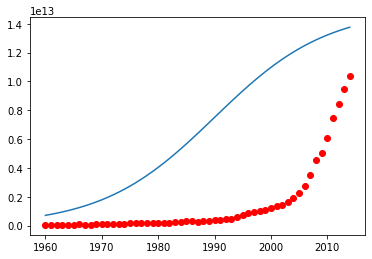

In [15]:
beta_1 = 0.10
beta_2 = 1990.0

# fungsi logistik (sigmoid)
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# Inisialisasi terhadap datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Kita harus dapatkan parameter terbaik untuk model kita, oleh karenanya yang pertama harus dilakukan adalah normalisasi x dan y

In [16]:
# Normalisasi data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Bagaimana menemukan parameter terbaik untuk fit line?

In [17]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# Cetak parameter terakhir
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


Plot-kan ke hasil model regresi

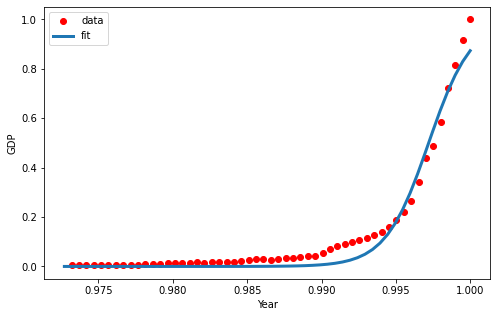

In [18]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Hitung akurasi dari model yang dibuat

In [19]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

c:\users\ribka\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Mean absolute error: 0.18
Residual sum of squares (MSE): 0.10
R2-score: -36681027586774619352555585536.00
